# Nearest neighbor classification

Arguably the most simplest classification method.

We are given example input vectors $x_i$ and corresponding class labels $c_i$ for $i=1,\dots, N$. 

The collection of pairs $\{x_i, c_i\}$ for $i=1\dots N$ is called a _data set_. 

Just store the dataset and for a new observed point $x$, find it's nearest neighbor $i^*$ and report $c_{i^*}$ 


$$
i^* = \arg\min_{i=1\dots N} D(x_i, x)
$$


In [7]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
df = pd.read_csv(u'data/iris.txt',sep=' ')
df

,sl,sw,pl,pw,c
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [34]:
X = np.hstack([
        np.matrix(df.sl).T, 
        np.matrix(df.sw).T, 
        np.matrix(df.pl).T, 
        np.matrix(df.pw).T])

print X[:5] # sample view

c = np.matrix(df.c).T
print c[:5]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[[1]
 [1]
 [1]
 [1]
 [1]]


In [42]:
def Divergence(x,y,p=2.):
    e = np.array(x) - np.array(y)
    if np.isscalar(p):
        return np.sum(np.abs(e)**p)
    else:
        return np.sum(np.matrix(e)*p*np.matrix(e).T)

Divergence([0,0],[1,1],p=2)
W = np.matrix(np.diag([2,1]))
Divergence([0,0],[1,1],p=W)
W = np.matrix([[2,1],[1,2]])
Divergence([0,0],[1,1],p=W)


6

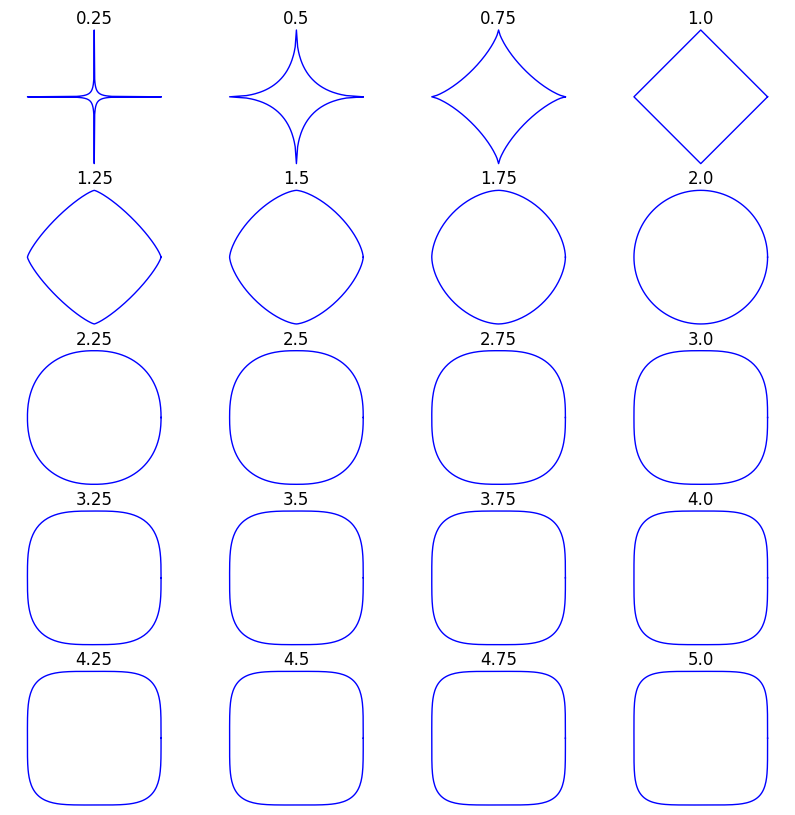

In [27]:
%run plot_normballs.py

In [91]:
def nearest(A,x, p=2):
    '''A: NxD data matrix, N - number of samples, D - the number of features
       x: test vector
       
       returns the distance and index of the the nearest neigbor
    '''
    N = A.shape[0]
    d = np.zeros((N,1))
    
    md = np.inf
    
    for i in range(N):
        d[i] = Divergence(A[i,:], x, p)
        if d[i]<md:
            md = d[i]
            min_idx = i
    
    return min_idx
    
def predict(A, c, X, p=2):
    L = X.shape[0]
    return [np.asscalar(c[nearest(A, X[i,:], p=p)]) for i in range(L)]

#x_test = np.mat('[3.3, 2.5,5.5,1.7]')

x_test = np.array([1,2]) + 5*np.random.randn(30,2)

#d, idx = distance(X, x_test, p=2)

cc = predict(X, c, x_test)

print(cc)
#float(c[idx])

[1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]


In [48]:
def leave_one_out(A, c, p=2):
    
    N = A.shape[0]   
    correct = 0    
    for j in range(N):
        md = np.inf
        for i in range(N):
            if i != j:
                d = Divergence(A[i,:], A[j,:], p=p)
                if d<md:
                    md = d
                    min_idx = i
        if c[min_idx] == c[j]:
            correct += 1
    
    accuracy = 1.*correct/N
    return accuracy
    
    

In [54]:
leave_one_out(X, c, p=np.diag([1,2,1,0.1]))

0.96

http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

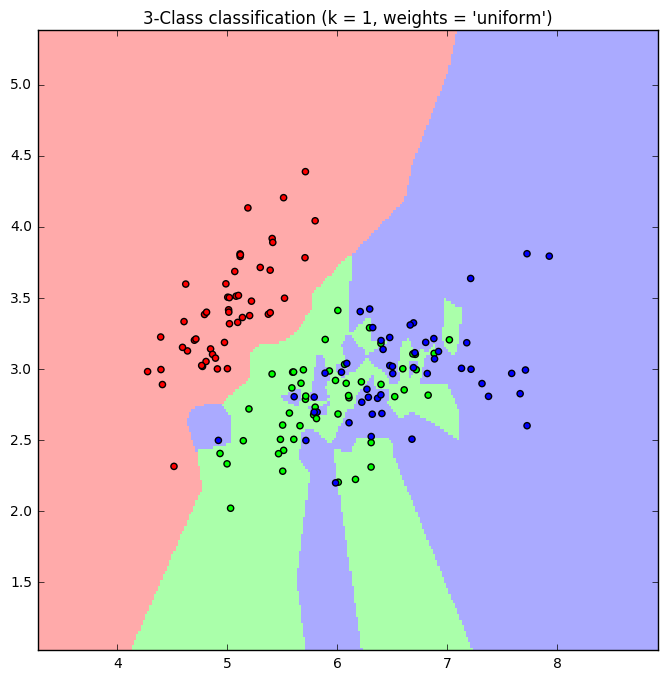

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 1

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] + 0.02*np.random.randn(150,2)  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02 # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

weights='uniform'
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, weights))

plt.show()